In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seaborn setup
sns.set(
    style="dark",
    context="notebook",
    palette="colorblind"
)

# Análise de satisfação de clientes

## Instruções 

Imagine que você foi contratado por uma Instituição Financeira de grande porte para analisar a satisfação dos clientes com os serviços prestados pela empresa.  

Como analistas de dados, nossa missão é coletar, processar e analisar um grande volume de dados para obter insights valiosos sobre o que os clientes pensam sobre a empresa, suas necessidades e expectativas.  

Para começar, vamos coletar dados de diversas fontes, como pesquisas de satisfação, registros de atendimento ao cliente, feedbacks nas redes sociais e reclamações registradas em plataformas de avaliação de empresas. Com esses dados em mãos, podemos criar um banco de dados robusto e padronizado para análise.

## Etapas

- Etapa 01: Analisar NPS de classificação de cada instituição
- Etapa 02: Calcular a % de elogios do app para cada instituição
- Etapa 03: Calcular a % de reclamações do app para cada instituição
- Etapa 04: Calcular a % de elogios a instituição para cada instituição
- Etapa 05: Calcular a % de reclamação a instituição para cada instituição
- Etapa 06: Plote um gráfico de linhas para entender a tendência das classificações por instituição

## Carregamento e pré-processamento do dataset

In [3]:
# Loading data
df = pd.read_excel("Dados_Satisfacao.xlsx")
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


In [4]:
# Showing data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   object        
 5   Reclamação quanto ao app  8702 non-null   object        
 6   Elogio a Instituição      8702 non-null   object        
 7   Reclamação a Instituição  8702 non-null   object        
 8   Não Classificável         8702 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 612.0+ KB


In [5]:
# Conveting object dtypes to category
cat_cols = df.select_dtypes("object").columns
df[cat_cols] = df.select_dtypes("object").astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   category      
 1   Comentario                8698 non-null   category      
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   category      
 5   Reclamação quanto ao app  8702 non-null   category      
 6   Elogio a Instituição      8702 non-null   category      
 7   Reclamação a Instituição  8702 non-null   category      
 8   Não Classificável         8702 non-null   category      
dtypes: category(7), datetime64[ns](1), int64(1)
memory usage: 379.8 KB


### Etapa 01: Analisar NPS de classificação de cada instituição

Para análise de NPS, a base será dividida entre clientes com rating menor que 3 (detratores) e maior ou igual a 4 (promotores).

In [6]:
def classify(df, banco):
    cond_banco = (df["Instituição"] == banco)
    cond_promotores = (df["Classificação"] >= 4)
    cond_detratores = (df["Classificação"] < 3)
    promotores = (cond_banco & cond_promotores).sum() / cond_banco.sum()
    detratores = (cond_banco & cond_detratores).sum() / cond_banco.sum()
    return promotores, detratores

In [7]:
# Creating an empty DataFrame with banks as index and NPS metrics as columns
NPS = pd.DataFrame(index=df["Instituição"].unique(), columns=["promotores", "detratores"])

In [8]:
# Filling NPS using classify function
for banco in NPS.index:
    NPS.loc[banco] = classify(df, banco)

In [9]:
# Showing NPS DataFrame after filling
display(NPS)

# Compute NPS and display DataFrame
NPS["NPS"] = NPS["promotores"] - NPS["detratores"]
NPS = NPS.sort_values(by="NPS", ascending=False)  # Sorting NPS DataFrame by NPS value (descending)
NPS

,promotores,detratores
Banco do Brasil,0.86954,0.087931
Banco Itau,0.76092,0.191379
Banco Bradesco,0.821941,0.139575
Nubank,0.771396,0.1861
Caixa Econômica Federal,0.682184,0.258046


,promotores,detratores,NPS
Banco do Brasil,0.86954,0.087931,0.781609
Banco Bradesco,0.821941,0.139575,0.682366
Nubank,0.771396,0.1861,0.585296
Banco Itau,0.76092,0.191379,0.56954
Caixa Econômica Federal,0.682184,0.258046,0.424138


Função para plotagem das porcentagens de reclamações ou elogios que será utilizada ao decorrer do notebook

In [10]:
def barplot(data, y: str, title: str):
    data = data.sort_values(by=y, ascending=False)
    ax = sns.barplot(data=data, x=data.index, y=y, order=data.index)
    plt.xticks(rotation=90)
    y_ticks = ax.get_yticks()
    ax.set_yticks(y_ticks)
    ax.set_yticklabels("")
    ax.set_title(title)
    for i in ax.containers:
        ax.bar_label(i, fmt="{:.0%}")


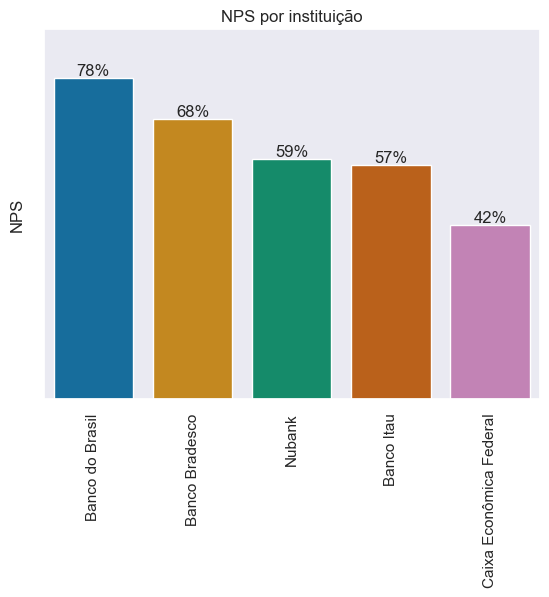

In [11]:
barplot(NPS, "NPS", "NPS por instituição")

### Etapa 02: Calcular a % de Elogios do app para cada instituição

In [12]:
df["Elogio quanto ao app"].unique()

['SIM', 'NÃO', 'NAO']
Categories (3, object): ['NAO', 'NÃO', 'SIM']

In [13]:
df["Elogio quanto ao app"] = df["Elogio quanto ao app"].map({"SIM": 1, "NÃO": 0, "NAO": 0})
df["Elogio quanto ao app"]

0       1
1       1
2       1
3       1
4       1
       ..
8697    1
8698    1
8699    1
8700    0
8701    1
Name: Elogio quanto ao app, Length: 8702, dtype: int64

In [14]:
# Creating an empty DataFrame
elogio_app = pd.DataFrame(index=df["Instituição"].unique(), columns=["porcentagem elogios"])

In [15]:
# Filling empty DataFrame with complaint percentage
for banco in elogio_app.index:
    banco_size = (df["Instituição"] == banco).sum()
    quant_elogios = (df[df["Instituição"] == banco]["Elogio quanto ao app"].sum())
    elogio_app.loc[banco] = quant_elogios / banco_size

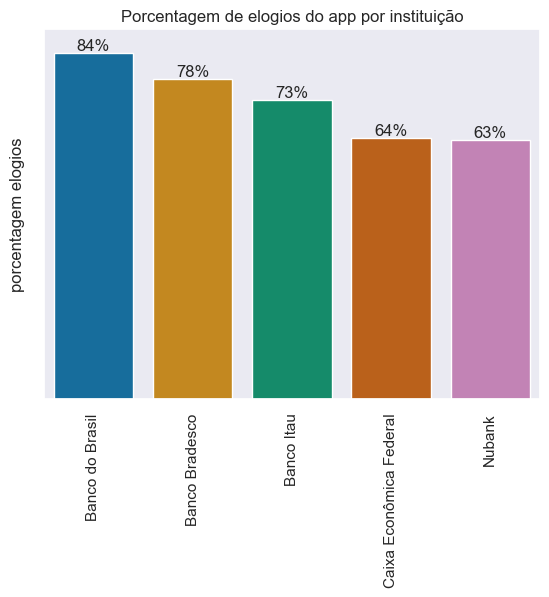

In [16]:
barplot(elogio_app, "porcentagem elogios", "Porcentagem de elogios do app por instituição")

### Etapa 03: Calcular a % de reclamações do app para cada instituição

In [17]:
df["Reclamação quanto ao app"].unique()

['NÃO', 'SIM']
Categories (2, object): ['NÃO', 'SIM']

In [18]:
df["Reclamação quanto ao app"] = df["Reclamação quanto ao app"].map({"SIM": 1, "NÃO": 0}).astype("int64")
df["Reclamação quanto ao app"]

0       0
1       0
2       0
3       0
4       0
       ..
8697    0
8698    0
8699    0
8700    1
8701    0
Name: Reclamação quanto ao app, Length: 8702, dtype: int64

In [19]:
# Creating an empty DataFrame
reclamacao_app = pd.DataFrame(index=df["Instituição"].unique(), columns=["porcentagem reclamacoes"])

In [20]:
# Filling empty DataFrame with complaint percentage
for banco in reclamacao_app.index:
    banco_size = (df["Instituição"] == banco).sum()
    quant_reclamacoes = (df[df["Instituição"] == banco]["Reclamação quanto ao app"].sum())
    reclamacao_app.loc[banco] = quant_reclamacoes / banco_size

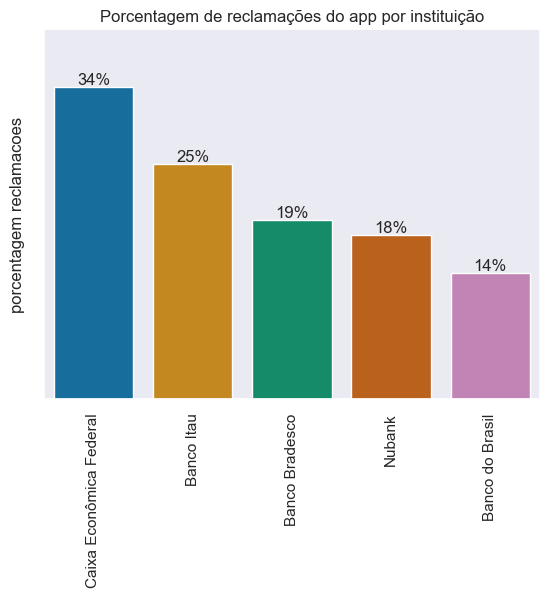

In [21]:
barplot(reclamacao_app, "porcentagem reclamacoes", "Porcentagem de reclamações do app por instituição")

### Etapa 04: Calcular a % de elogios a instituição para cada instituição

In [22]:
# Creating an empty DataFrame
elogio_banco = pd.DataFrame(index=df["Instituição"].unique(), columns=["porcentagem elogios"])

In [23]:
df["Elogio a Instituição"].unique()

['NÃO', 'SIM']
Categories (2, object): ['NÃO', 'SIM']

In [24]:
df["Elogio a Instituição"] = df["Elogio a Instituição"].map({"SIM": 1, "NÃO": 0}).astype("int64")
df["Elogio a Instituição"]

0       0
1       0
2       0
3       0
4       0
       ..
8697    0
8698    0
8699    0
8700    0
8701    0
Name: Elogio a Instituição, Length: 8702, dtype: int64

In [25]:
# Filling empty DataFrame with complaint percentage
for banco in elogio_banco.index:
    banco_size = (df["Instituição"] == banco).sum()
    quant_elogios = (df[df["Instituição"] == banco]["Elogio a Instituição"].sum())
    elogio_banco.loc[banco] = quant_elogios / banco_size

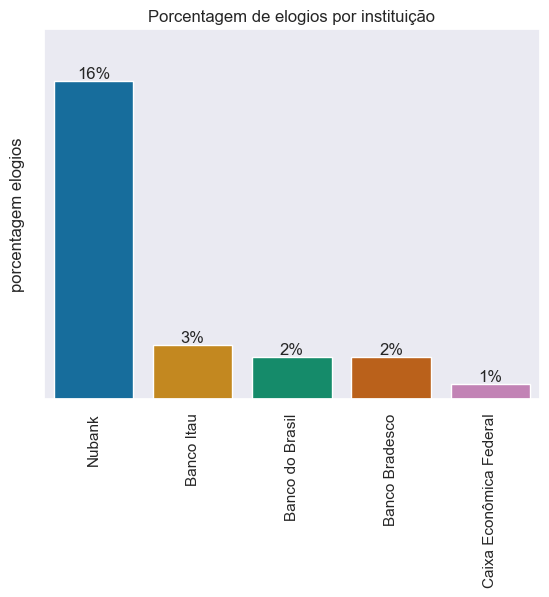

In [26]:
barplot(elogio_banco, "porcentagem elogios", "Porcentagem de elogios por instituição")

### Etapa 05: Calcular a % de reclamação a instituição para cada instituição

In [27]:
# Creating an empty DataFrame
reclamacao_banco = pd.DataFrame(index=df["Instituição"].unique(), columns=["porcentagem reclamacoes"])

In [28]:
df["Reclamação a Instituição"].unique()

['NÃO', 'SIM']
Categories (2, object): ['NÃO', 'SIM']

In [29]:
df["Reclamação a Instituição"] = df["Reclamação a Instituição"].map({"SIM": 1, "NÃO": 0}).astype("int64")
df["Reclamação a Instituição"]

0       0
1       0
2       0
3       0
4       0
       ..
8697    0
8698    0
8699    0
8700    0
8701    0
Name: Reclamação a Instituição, Length: 8702, dtype: int64

In [30]:
# Filling empty DataFrame with complaint percentage
for banco in reclamacao_banco.index:
    banco_size = (df["Instituição"] == banco).sum()
    quant_reclamacoes = (df[df["Instituição"] == banco]["Reclamação a Instituição"].sum())
    reclamacao_banco.loc[banco] = quant_reclamacoes / banco_size

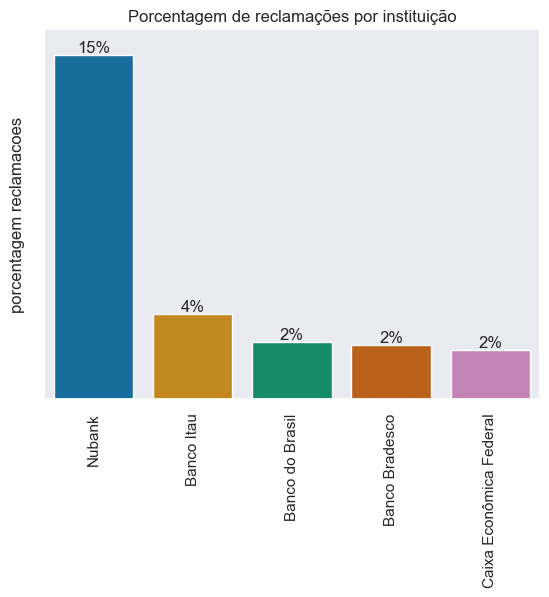

In [31]:
barplot(reclamacao_banco, "porcentagem reclamacoes", "Porcentagem de reclamações por instituição")

### Etapa 06: Plote um gráfico de linhas para entender a tendência das classificações por instituição

In [32]:
df.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,1,0,0,0,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,1,0,0,0,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,1,0,0,0,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,1,0,0,0,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,1,0,0,0,NÃO


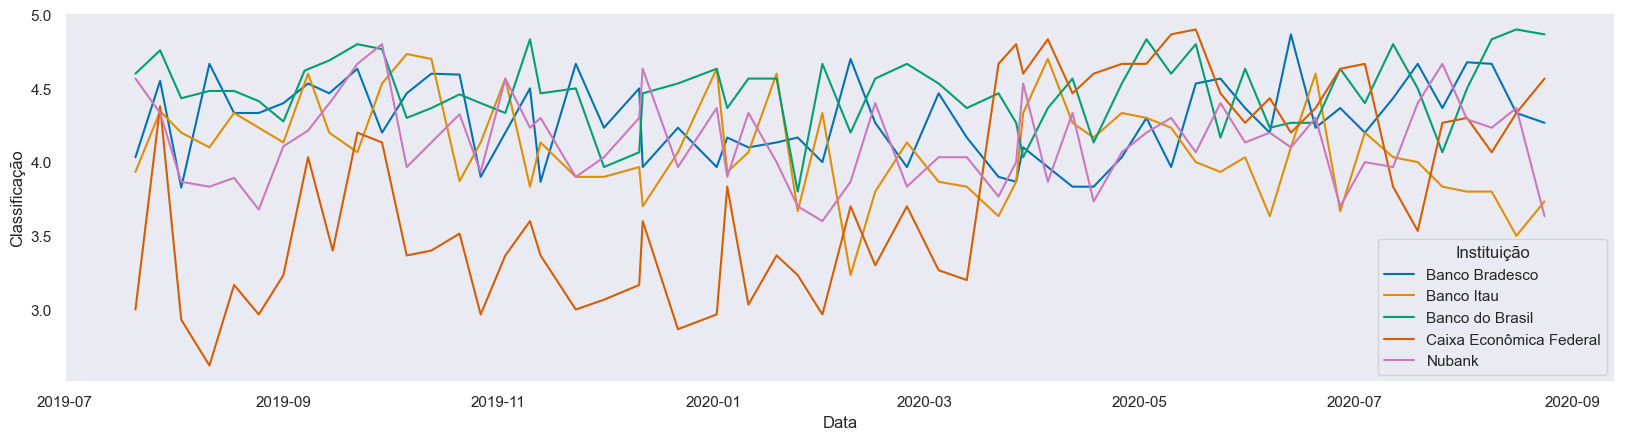

In [33]:
fig = plt.figure(figsize=(20, 4.8))
sns.lineplot(data=df, x="Data", y="Classificação", hue="Instituição", errorbar=None);